# Evolving Niches with Noise
## Noisy runs after 300 generations.

50 simulations of 300 generations were run with noise on channels 0, 1, and 2 from the outset..

In [3]:
%load_ext autoreload
%autoreload 2

import logging
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%aimport -matplotlib
%aimport -pandas
%aimport -seaborn
%aimport -logging
%aimport -os

import analysis.ks
import dataframe.calculations.spectrum
from dataframe.calculations import specific_generation_over_runs
import visualize.dataframe
plt.style.use(['dark_background'])

logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(threadName)s - %(name)s - %(levelname)s - %(message)s')

rootlogger = logging.getLogger()
f = logging.Filter(name='evolvingniches')
logger = logging.getLogger('evolvingniches.run')
rootlogger.addFilter(f)
logger = logging.getLogger('evolvingniches.jupyter')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
directory = '/Users/davk/Documents/phd/projects/EvolvingNiches/data/20D17_g0_c012_i1_300x50/'

## Average of the 50 runs

The plot below shows the average spectrum of all 50 noisy simulations.
Noise of amplitude 1.0 is present on channels 0, 1, and 2 for all 300 generations.
In the first generations, the populations communicate on all 9 channels, but usage of the 3 noisy channels quickly drops off.

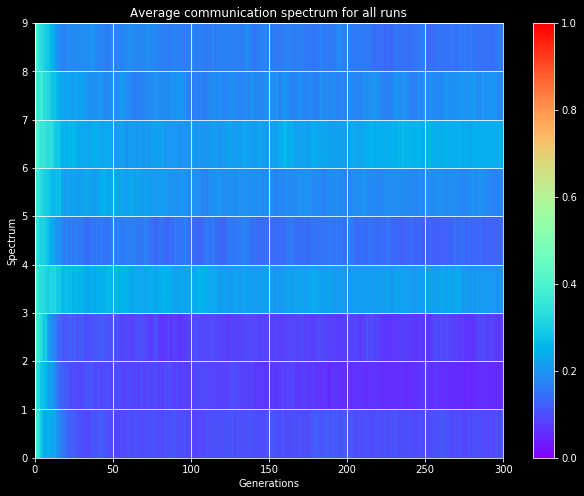

In [5]:
spectra = pd.read_parquet(directory + 'encoded_spectrum.parquet')
species = pd.read_parquet(os.path.join(directory, 'species.parquet'))
subspecies = pd.read_parquet(os.path.join(directory, 'subspecies.parquet'))
fitness = pd.read_parquet(os.path.join(directory, 'fitness.parquet'))
individuals = pd.read_parquet(os.path.join(directory, 'individuals.parquet'))
visualize.dataframe.plot_spectrum(spectra, vmin=0.0, vmax=1.0, view=True, filename=None)

last_10_species = specific_generation_over_runs(range(289,299), data=species)
run_role_fitness = last_10_species.groupby(['run','role'])['fitness'].mean()
run_fitness = run_role_fitness.groupby('run').mean()

spectra_ob_fitness = spectra.join(run_fitness).sort_values(['fitness','generation'], ascending=[False, True])
spectra_ob_fitness = spectra_ob_fitness.drop(columns='fitness')

## Individual Runs

It's important to see the variation in the individual runs as well.
The 50 runs are split between the two plots below with the first showing runs 0-24 and the second showing 25-49
(it is ordered so that the first row is runs 0-4 and so on).

By the end of the 300 generations, most runs show consistent usage on 2-3 channels, though few of those use channels 0-2.

*TODO*: It would be interesting to see this ordered by fitness in the last few generations...

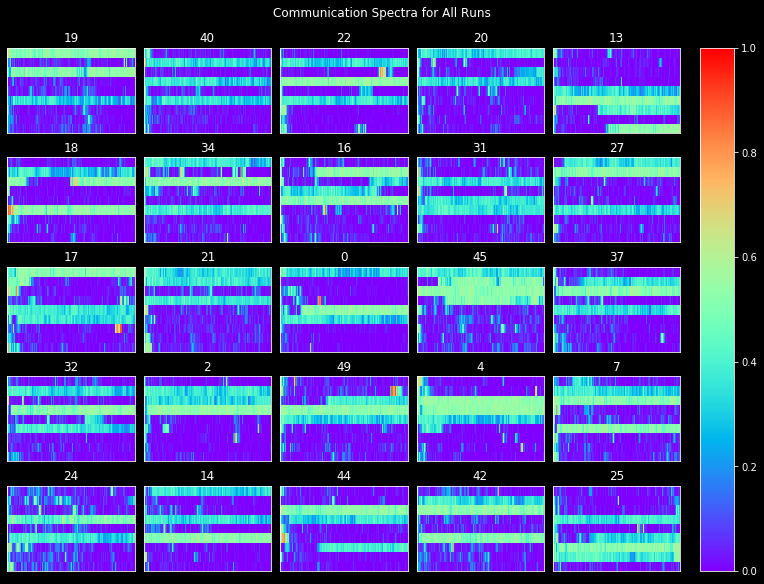

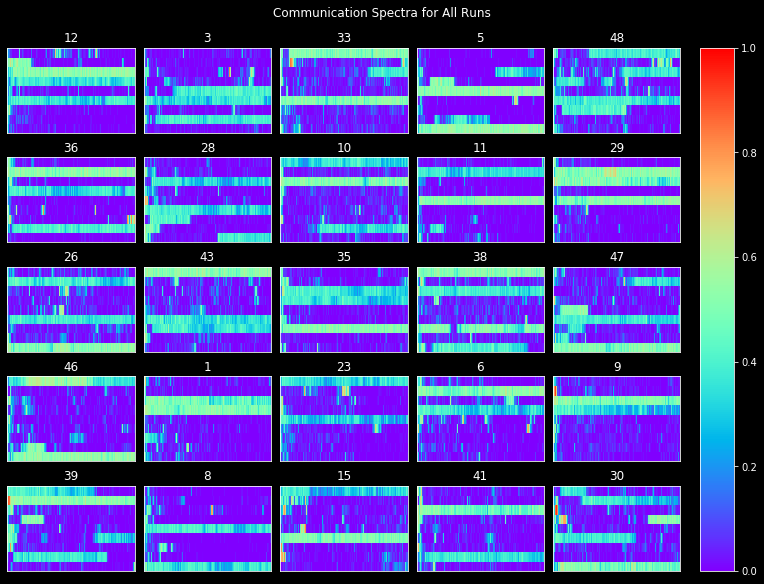

In [6]:
visualize.dataframe.plot_run_spectra(spectra_ob_fitness, vmin=0.0, vmax=1.0, view=True, filename=None, shape=(5, 5), numbering=True)

last_25 = spectra_ob_fitness.loc[spectra_ob_fitness.index.get_level_values('run').unique()[25:]]
visualize.dataframe.plot_run_spectra(last_25, vmin=0.0, vmax=1.0, view=True, filename=None, shape=(5, 5), numbering=True)

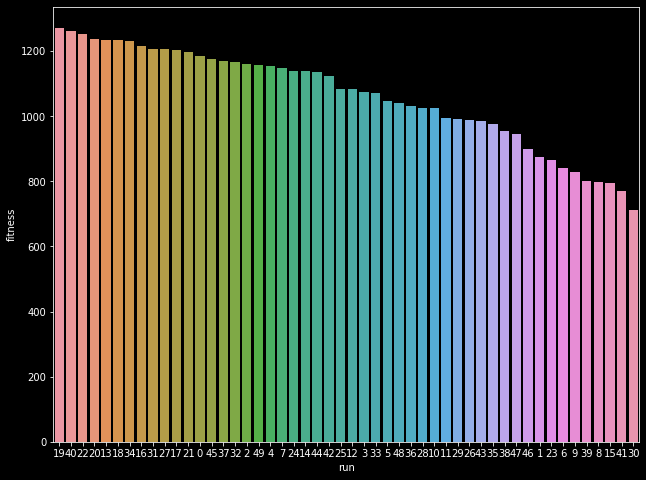

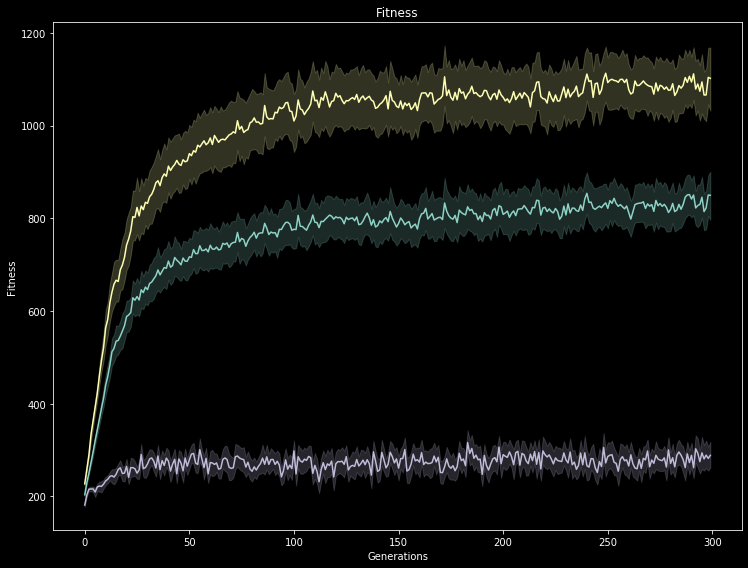

In [12]:
order = run_fitness.reset_index().sort_values('fitness', ascending=False)['run']
sns.barplot(x='run', y='fitness', order=order, data=run_fitness.reset_index())
plt.show()

visualize.dataframe.plot_species_fitness(fitness, species=0, role='sender', view=True, filename=None)


19, 13, 25,

## Runs 5, 0, and 45

I've highlighted runs 5, 0, and 45 below because they are each interesting in their own way.
### Run 5
Run 5 is a pretty average run.
The population almost immediately drops channel 2 in favour of channel 6, but keeps channel 0 for the duration of the simulation.
### Run 0
Run 0 seems confused. It drops channel 2 right away and plays with channels 1, 6, and 9 before picking 2 back up and eventually dropping the rest.
However, towards the end of the simulation, it drops 2 again and switches over to another noisy channel - channel 1.
Why does it do this? What does this do to its fitness?

### Run 45
Run 45 is the only one that seemingly gets it "right".
It drops channels 0 and 2 right away and picks up channel 3 almost immediately.
Eventually, it also picks up channel 5 and has now moved fully away from the noisy channels towards a 3-channel noiseless setup.

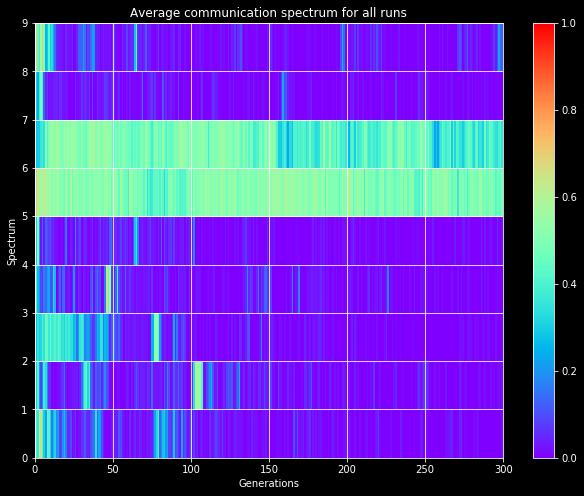

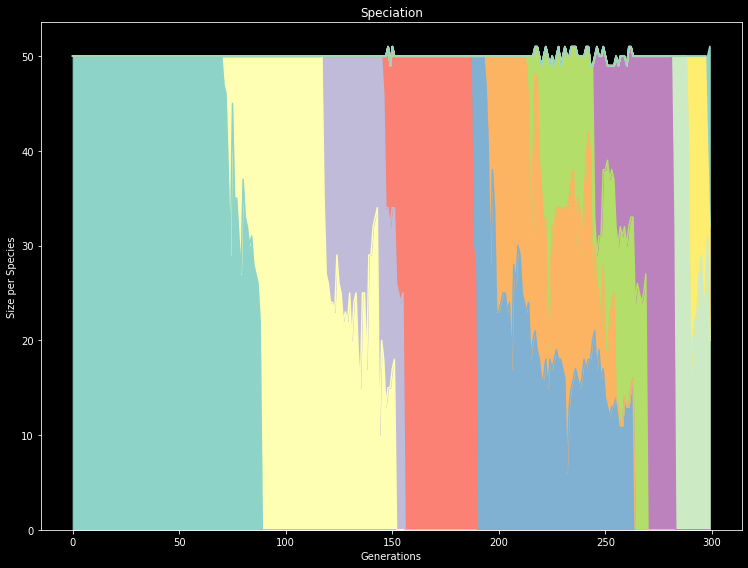

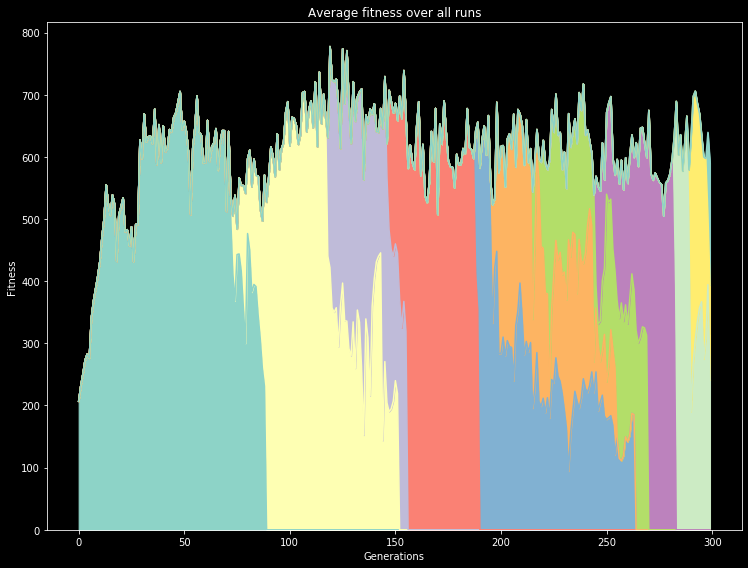

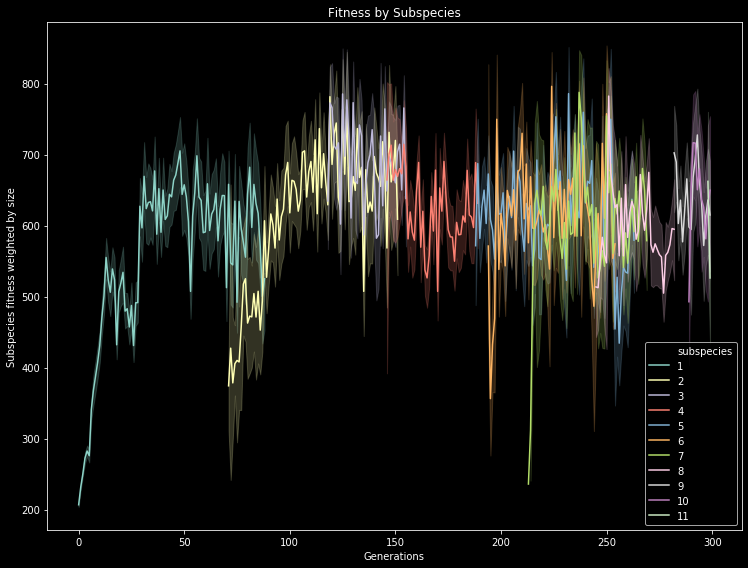

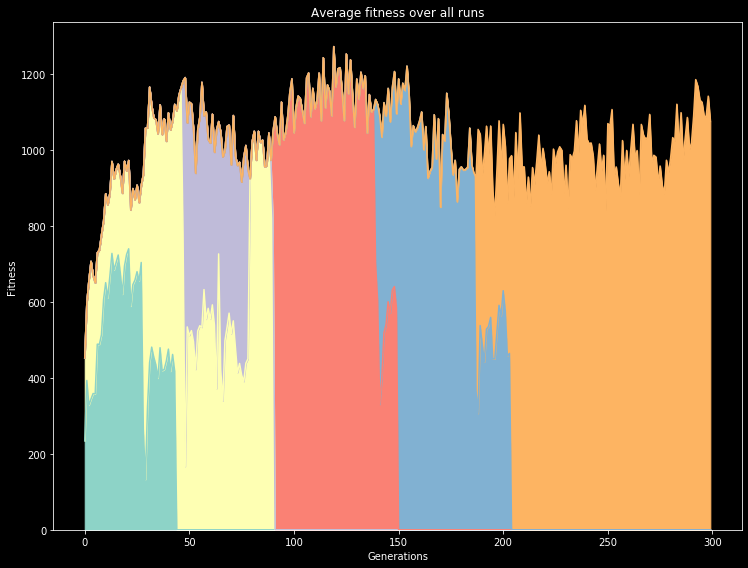

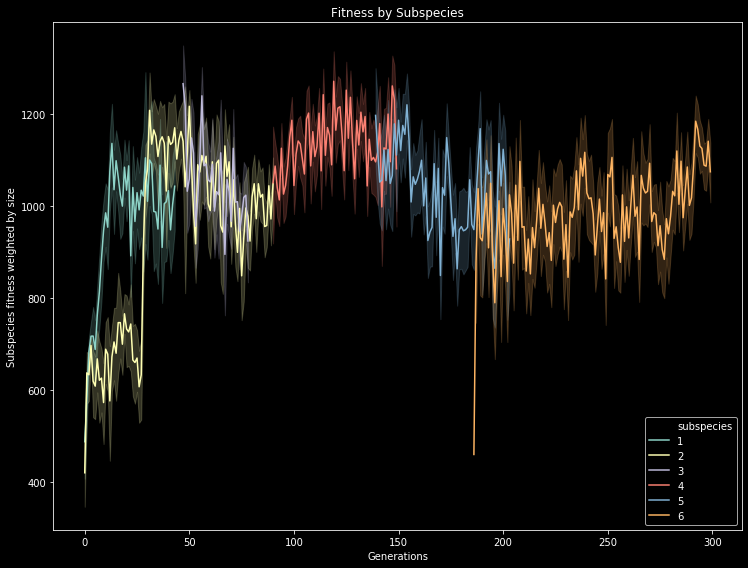

In [8]:
n = 1
run = spectra.loc[n]
visualize.dataframe.plot_spectrum(run, vmin=0.0, vmax=1.0, view=True)
visualize.dataframe.plot_subspecies_abundances(subspecies, run=n, species=0, role='sender', view=True)
visualize.dataframe.plot_subspecies_fitness(subspecies, run=n, species=0, role='sender', view=True)
visualize.dataframe.plot_subspecies_average_fitness(individuals, run=n, species=0, role='sender', view=True, filename=None)
visualize.dataframe.plot_subspecies_fitness(subspecies, run=n, species=0, role='receiver', view=True, filename=None)
visualize.dataframe.plot_subspecies_average_fitness(individuals, run=n, species=0, role='receiver', view=True, filename=None)

# run = spectra.loc[21]
# visualize.dataframe.plot_spectrum(run, vmin=0.0, vmax=1.0, view=True, filename=None)
#
# run = spectra.loc[23]
# visualize.dataframe.plot_spectrum(run, vmin=0.0, vmax=1.0, view=True, filename=None)
#
# run = spectra.loc[25]
# visualize.dataframe.plot_spectrum(run, vmin=0.0, vmax=1.0, view=True, filename=None)
#
# run = spectra.loc[38]
# visualize.dataframe.plot_spectrum(run, vmin=0.0, vmax=1.0, view=True, filename=None)

## Channel volumes over the last 10 generations

ELABORATE

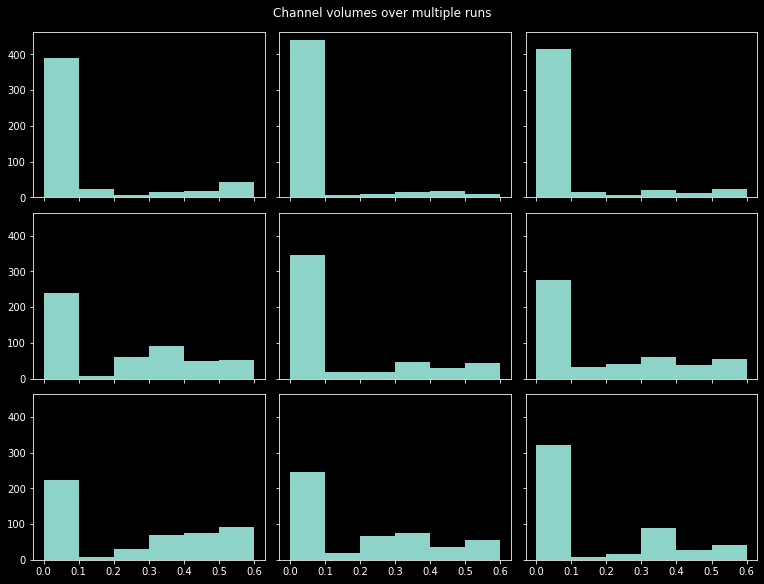

In [13]:
last10 = specific_generation_over_runs(range(289,299), data=spectra)

visualize.dataframe.plot_channel_volume_histogram(last10, view=True, filename=None)

## KS Analysis

ELABORATE

In [14]:
ks_stat, ks_p = analysis.ks.kolmogorov_smirnov_matrix(last10)

stat_cluster_centers_indices, stat_labels = analysis.ks.kolmogorov_smirnov_clusters(ks_stat)
p_cluster_centers_indices, p_labels = analysis.ks.kolmogorov_smirnov_clusters(ks_p) 



[[0.    0.104 0.092 0.332 0.144 0.25  0.36  0.298 0.182]
 [0.104 0.    0.056 0.416 0.198 0.334 0.444 0.392 0.25 ]
 [0.092 0.056 0.    0.37  0.184 0.304 0.394 0.36  0.22 ]
 [0.332 0.416 0.37  0.    0.234 0.122 0.144 0.062 0.174]
 [0.144 0.198 0.184 0.234 0.    0.162 0.262 0.208 0.09 ]
 [0.25  0.334 0.304 0.122 0.162 0.    0.174 0.086 0.104]
 [0.36  0.444 0.394 0.144 0.262 0.174 0.    0.18  0.21 ]
 [0.298 0.392 0.36  0.062 0.208 0.086 0.18  0.    0.156]
 [0.182 0.25  0.22  0.174 0.09  0.104 0.21  0.156 0.   ]]
[[0.     0.0089 0.029  0.     0.0001 0.     0.     0.     0.    ]
 [0.0089 0.     0.4135 0.     0.     0.     0.     0.     0.    ]
 [0.029  0.4135 0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.0012 0.0001 0.2919 0.    ]
 [0.0001 0.     0.     0.     0.     0.     0.     0.     0.0348]
 [0.     0.     0.     0.0012 0.     0.     0.     0.0495 0.0089]
 [0.     0.     0.     0.0001 0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0